# 汎用スクリプト　base
概要：このファイルは①データ読み込み、②可視化、③前処理、④分析までを型化し、汎用利用を考えたもの

活用方法：記載されているコードをベースにし、プロセスごとにコードを整理し、データサイエンスプロセスを効率化




## ⓪ライブラリ読み込み

In [138]:
#データ加工ライブラリ
import pandas as pd

#可視化ライブラリ
import matplotlib.pyplot as plt
import seaborn as sns

#label encoding
from sklearn.preprocessing import LabelEncoder

import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings


## ①データ読み込み



## 進め方

■流れ
文字コードによって適切に読み込まれない場合がある場合は、以下の様に進める

①文字コードの特定(nkf)　②pandas.read_csvの引数指定

■文字コード

https://dev.classmethod.jp/tool/character-code-and-line-feed-code-converting-tools-matome/

■公式　pandas.read_csv

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html



In [124]:
#csvファイルの読み込み
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')



## ②可視化


セルを右クリックして、variable inspectorを利用すると、データの表を確認できる

より複雑な可視化をする場合は、BIツールで実施したほうが費用対効果高そう

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

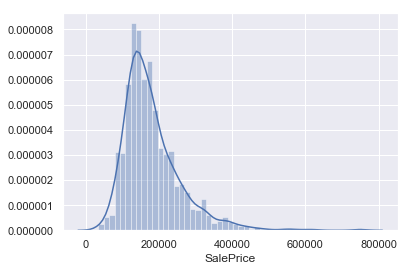

-----------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Ext

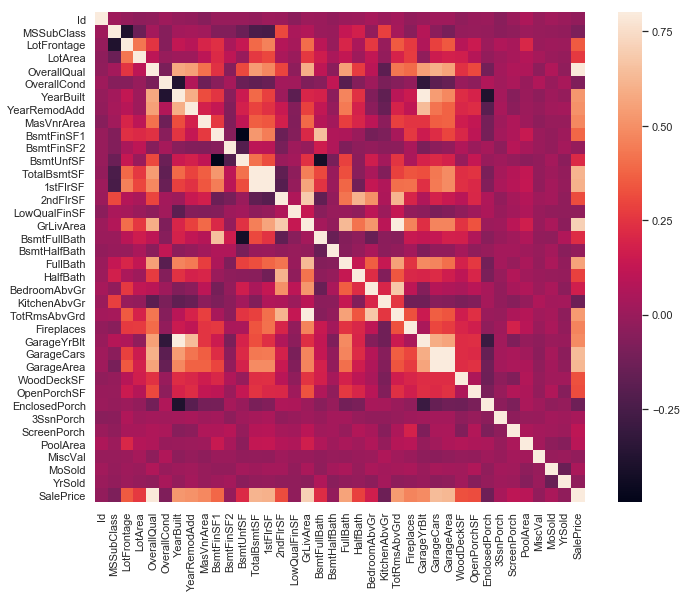

In [125]:
#列名の確認
print(df_train.columns)
print("-----------------------")

#目的変数の基本統計量確認
print(df_train['SalePrice'].describe())
print("-----------------------")

#目的変数をヒストグラムでの可視化
sns.distplot(df_train['SalePrice'])
plt.show()

#データフレーム情報　
#フレームの見方
# data_column(項目名) num(数が行数とあっていれば、欠損なし) int64,float64,object(object⇛質的変数　int,float⇛量的変数)

print("-----------------------")
print("データフレーム情報_train",df_train.info())

print("-----------------------")
print("データフレーム情報_test",df_test.info())

#相関ヒートマップ
corrmat=df_train.corr()
f,ax=plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=0.8,square=True)
plt.show()

## ③前処理
各変数において必要な処理は以下のようになる。（個人的な理解）特徴量エンジニアリングの世界なので、まだ完全に定石手法を理解しきれていない、

①特徴選択

②特徴データに対する欠損対応

③適切なデータ変換(量⇛質　質⇛量)

③説明変数に対して、正規化対応

## 特徴選択

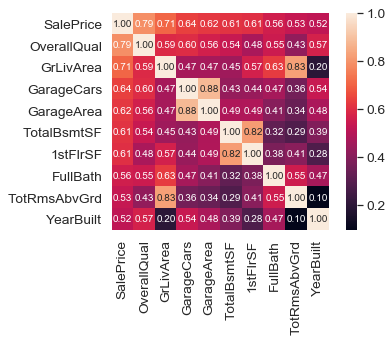

In [126]:
#目的変数と説明変数の相関高TOP10
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### 特徴量選択のロジック

まず'OverallQual','GrLivArea','TotalBsmtSF'は'SalePrice'への相関が高い。
　⇛特徴量に入れよう

'GarageCars' と'GarageArea'は目的変数に対して、相関が強い変数ではあるが、ガレージに入る車の数はガレージの広さの結果によるものであるので、多重共線性があるといえる。
　⇛どちらか一つを選択する必要があるので、目的変数への相関が強い'GarageCars'を選択する
 
'TotalBsmtSF' と'1stFloor'も多重共線性がありそう、'TotalBsmtSF'を残す。

'TotRmsAbvGrd' と'GrLivArea'も多重共線性がありそう



In [127]:
#特徴量選択
feature_column=['OverallQual', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']

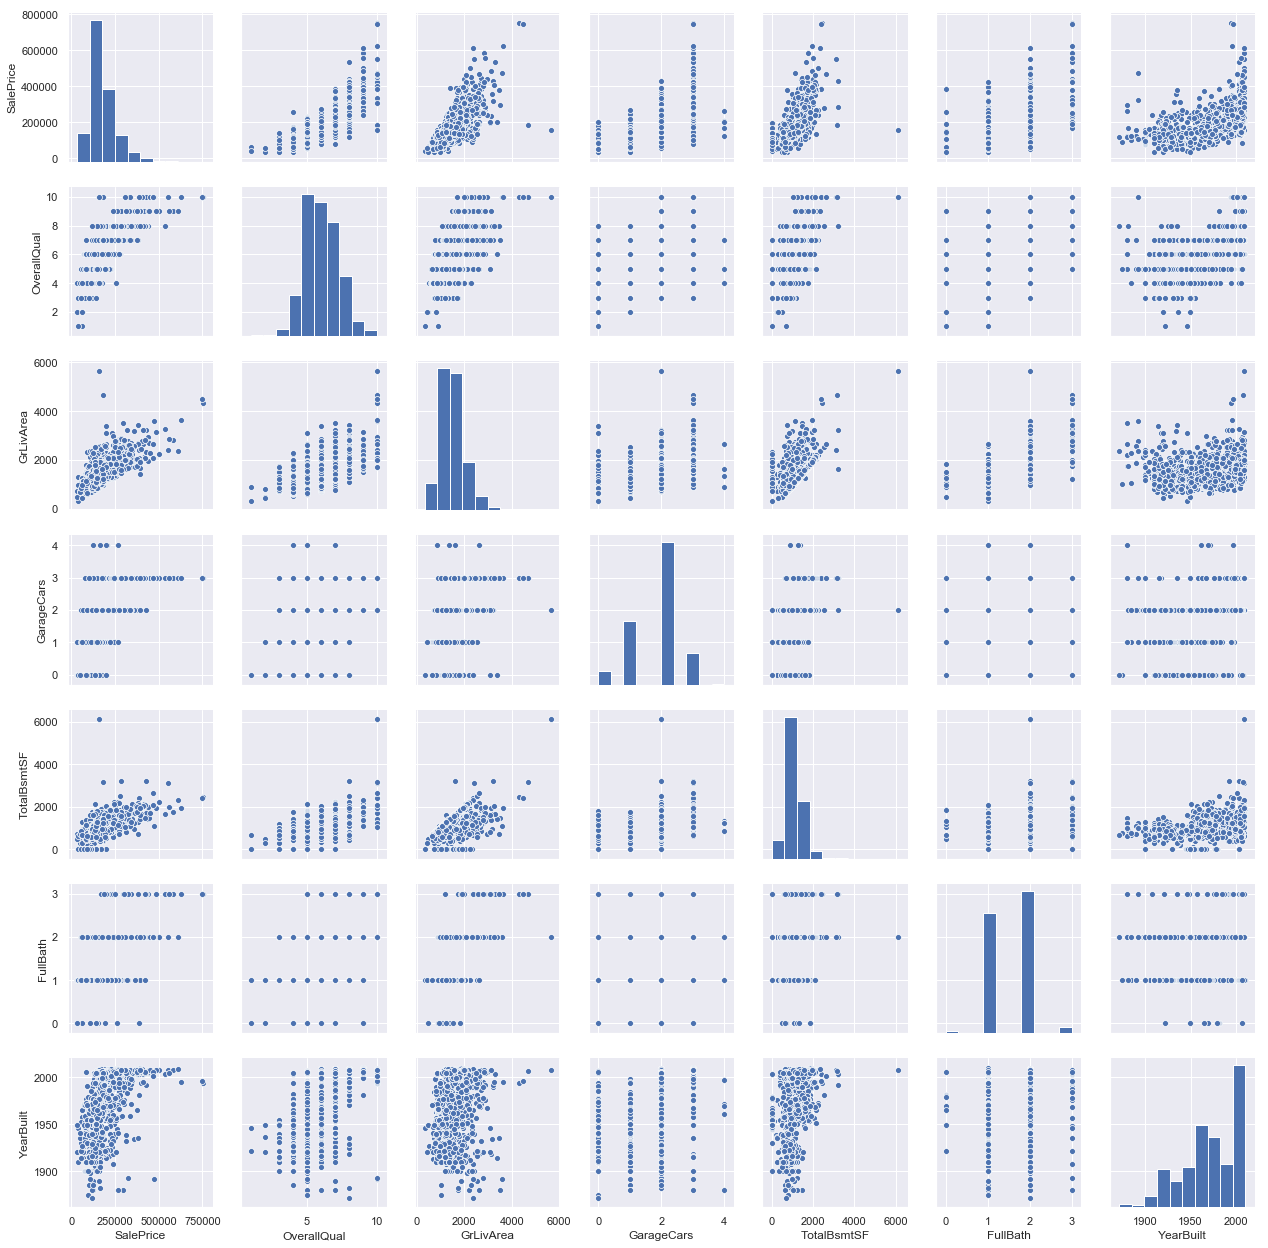

In [128]:
#散布図による確認
sns.set()
cols=['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','YearBuilt']
sns.pairplot(df_train[cols],height=2.5)
plt.show()


## 前処理

In [129]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(df_train.shape))
print("The test data size before dropping Id feature is : {} ".format(df_test.shape))

#Save the 'Id' column
train_ID = df_train['Id']
test_ID = df_test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
df_train.drop("Id", axis = 1, inplace = True)
df_test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(df_train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(df_test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


## 欠損対応

In [132]:
#テストデータと学習データの結合
ntrain = df_train.shape[0]
ntest = df_test.shape[0]
y_train = df_train.SalePrice.values
all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

#欠損値の確認
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)


#欠損対応 (データ項目説明参照)

#None置換
all_data["PoolQC"]=all_data["PoolQC"].fillna("None")
all_data["MiscFeature"]=all_data["MiscFeature"].fillna("None")
all_data["Alley"]=all_data["Alley"].fillna("None")
all_data["Fence"]=all_data["Fence"].fillna("None")
all_data["FireplaceQu"]=all_data["FireplaceQu"].fillna("None")

for col in ('GarageType','GarageFinish','GarageQual','GarageCond'):
    all_data[col]=all_data[col].fillna('None')
    
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
    
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

#0置換
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col]=all_data[col].fillna(0)
    
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

#median置換 Neighthood(近所)でグループバイしてやれば、エリア毎のmedianを求めることができる
all_data['LotFrontage']=all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x:x.fillna(x.median()))

all_data['MSZoning']=all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

all_data['Electrical']=all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

all_data['KitchenQual']=all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

#特定の値に置換
all_data["Functional"]=all_data["Functional"].fillna("Typ")

#列の削除
all_data=all_data.drop(['Utilities'],axis=1)

#欠損値のあるデータ項目がないか確認する
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()







all_data size is : (2919, 79)


C:\Users\10696\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """


,Missing Ratio


## 量的変数から質的変数へ変換

In [135]:
all_data['MSSubClass']=all_data['MSSubClass'].apply(str)

all_data['OverallCond']=all_data['OverallCond'].astype(str)

all_data['YrSold']=all_data['YrSold'].astype(str)
all_data['MoSold']=all_data['MoSold'].astype(str)


## label encoding

In [137]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

# shape        
print('Shape all_data: {}'.format(all_data.shape))

NameError: name 'LabelEncoder' is not defined

## 外れ値対応

In [ ]:
#外れ値対応

saleprice_scaled=StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis])
low_range=saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range=saleprice_scaled[saleprice_scaled[:,0].argsort()[-10:]]
print("outer range (low) of the distribution")
print(low_range)
print("\n outer range (high) pf the destribution")
print(high_range)

var='GrLivArea'
data=pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,8000000))
plt.show()



#外れ値を削除

df_train.sort_values(by='GrLivArea',ascending=False)[:2]
sns.distplot(df_train['GrLivArea'])
plt.show()

var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

var='TotalBsmtSF'
data=pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))
plt.show()

## データ確認

正規性

分散均一性

線形性

誤差相関







In [ ]:
#ヒストグラムと正規確率分布
sns.distplot(df_train['SalePrice'],fit=norm)
fig=plt.figure()
res=stats.probplot(df_train['SalePrice'],plot=plt)
plt.show()

#データ変形
df_train['GrLivArea']=np.log(df_train['GrLivArea'])

#変形後のヒストグラムと正規確率分布
sns.distplot(df_train['GrLivArea'],fit=norm)
fig=plt.figure()
res=stats.probplot(df_train['GrLivArea'],plot=plt)
plt.show()

#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)
plt.show()

#散布図
plt.scatter(df_train['GrLivArea'],df_train['SalePrice'])

plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'],df_train[df_train['TotalBsmtSF']>0]['SalePrice'])

df_train=pd.get_dummies(df_train)

## ④データ分析